In [4]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn import datasets
from tensorflow.python.framework import ops
tf.disable_v2_behavior()


In [5]:
regression_type = 'Ridge'
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [6]:
# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# make results reproducible
seed = 13
np.random.seed(seed)
tf.set_random_seed(seed)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [7]:
ridge_param = tf.constant(1.)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.multiply(ridge_param, ridge_loss)), 0)

In [13]:
###
# Optimizer
###

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

###
# Run regression
###

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%300==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
        print('\n')

###
# Extract regression results
###

# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

Step #300 A = [[1.8252085]] b = [[1.3951107]]
Loss = [9.513597]


Step #600 A = [[1.6832732]] b = [[2.4444954]]
Loss = [5.2858744]


Step #900 A = [[1.3916274]] b = [[3.1539173]]
Loss = [3.3784995]


Step #1200 A = [[1.1452363]] b = [[3.6882489]]
Loss = [2.209313]


Step #1500 A = [[0.95807034]] b = [[4.103454]]
Loss = [1.4893541]


Step #1800 A = [[0.80661875]] b = [[4.4158573]]
Loss = [0.9007975]


Step #2100 A = [[0.6956472]] b = [[4.6581674]]
Loss = [0.9048141]


Step #2400 A = [[0.61126673]] b = [[4.8450155]]
Loss = [0.67342424]


Step #2700 A = [[0.5402473]] b = [[4.983625]]
Loss = [0.6991923]


Step #3000 A = [[0.49172774]] b = [[5.0930095]]
Loss = [0.6377003]


Step #3300 A = [[0.45551804]] b = [[5.178001]]
Loss = [0.45906603]


Step #3600 A = [[0.4253817]] b = [[5.2426805]]
Loss = [0.54355437]


Step #3900 A = [[0.40300742]] b = [[5.2918887]]
Loss = [0.618393]


Step #4200 A = [[0.38418248]] b = [[5.327912]]
Loss = [0.57239103]


Step #4500 A = [[0.3701094]] b = [[5.3561945]]


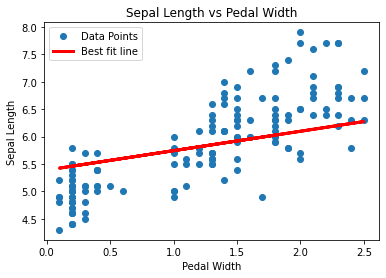

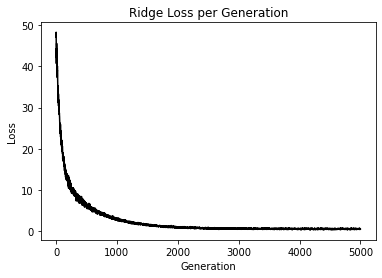

In [14]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

plt.plot(loss_vec, 'k-')
plt.title(regression_type + ' Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()